### 1 - Import packages

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import collections

### 2 - Import data and remove unused columns/rows

In [3]:
real_reviews_df = pd.read_csv("../sa-data/clean-shopee-reviews.csv")

In [4]:
real_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     523 non-null    int64 
 1   username       523 non-null    object
 2   rating         523 non-null    int64 
 3   comment        523 non-null    object
 4   clean_comment  522 non-null    object
 5   clean_tokens   523 non-null    object
dtypes: int64(2), object(4)
memory usage: 24.6+ KB


In [5]:
real_reviews_df.isnull().sum()

Unnamed: 0       0
username         0
rating           0
comment          0
clean_comment    1
clean_tokens     0
dtype: int64

In [6]:
real_reviews_df = real_reviews_df[~real_reviews_df.clean_comment.isnull()]

real_reviews_df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
real_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 0 to 522
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   username       522 non-null    object
 1   rating         522 non-null    int64 
 2   comment        522 non-null    object
 3   clean_comment  522 non-null    object
 4   clean_tokens   522 non-null    object
dtypes: int64(1), object(4)
memory usage: 24.5+ KB


In [8]:
real_reviews_df.isnull().sum()

username         0
rating           0
comment          0
clean_comment    0
clean_tokens     0
dtype: int64

### 3 - Split the data according to star ratings

- 5-star
- 4-star
- 3-star
- 2-star
- 1-star

In [9]:
five_star_reviews = real_reviews_df[real_reviews_df["rating"] == 5]
four_star_reviews = real_reviews_df[real_reviews_df["rating"] == 4]
three_star_reviews = real_reviews_df[real_reviews_df["rating"] == 3]
two_star_reviews = real_reviews_df[real_reviews_df["rating"] == 2]
one_star_reviews = real_reviews_df[real_reviews_df["rating"] == 1]

print("Number of 5-star ratings:", len(five_star_reviews))
print("Number of 4-star ratings:", len(four_star_reviews))
print("Number of 3-star ratings:", len(three_star_reviews))
print("Number of 2-star ratings:", len(two_star_reviews))
print("Number of 1-star ratings:", len(one_star_reviews))

Number of 5-star ratings: 493
Number of 4-star ratings: 18
Number of 3-star ratings: 4
Number of 2-star ratings: 5
Number of 1-star ratings: 2


### 3a - 5-star reviews

In [10]:
five_star_words = " ".join(review for review in five_star_reviews["clean_comment"].to_list())

In [11]:
""" Top 20 words amongst 5-star reviews """

five_star_wordlist = five_star_words.split(' ')

counter_five = collections.Counter(five_star_wordlist)
counter_five.most_common(20)

[('bracelet', 151),
 ('pretty', 150),
 ('ring', 145),
 ('love', 134),
 ('good', 120),
 ('receive', 99),
 ('live', 98),
 ('buy', 94),
 ('item', 93),
 ('purchase', 90),
 ('nice', 84),
 ('seller', 82),
 ('well', 78),
 ('delivery', 69),
 ('beautiful', 58),
 ('happy', 52),
 ('quality', 51),
 ('thanks', 51),
 ('thank', 51),
 ('get', 50)]

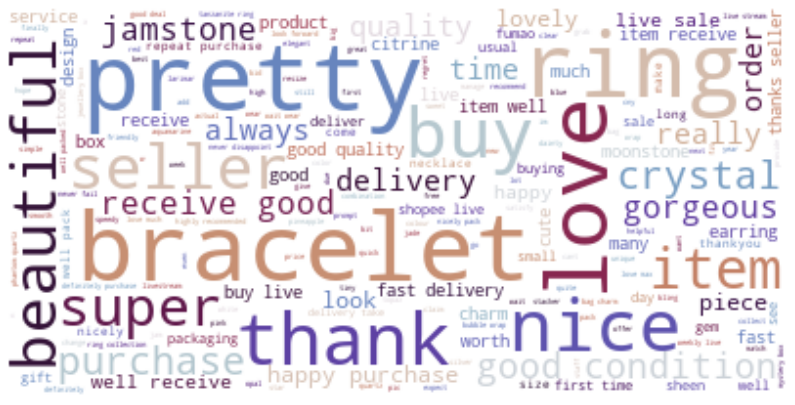

In [12]:
five_star_wordcloud = WordCloud(
    background_color='white',
    max_font_size = 50,
    max_words = 500,
    colormap='twilight').generate(five_star_words)

plt.figure(figsize=(14, 12))
plt.imshow(five_star_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3b - 4-star reviews

In [13]:
four_star_words = " ".join(review for review in four_star_reviews["clean_comment"].to_list())

In [14]:
""" Top 20 words amongst 4-star reviews """

four_star_wordlist = four_star_words.split(' ')

counter_four = collections.Counter(four_star_wordlist)
counter_four.most_common(20)

[('delivery', 9),
 ('seller', 9),
 ('item', 7),
 ('receive', 6),
 ('live', 6),
 ('ring', 6),
 ('buy', 4),
 ('good', 4),
 ('crystal', 3),
 ('week', 3),
 ('bracelet', 3),
 ('pretty', 3),
 ('order', 3),
 ('time', 3),
 ('day', 3),
 ('look', 3),
 ('design', 3),
 ('parcel', 3),
 ('leave', 3),
 ('show', 2)]

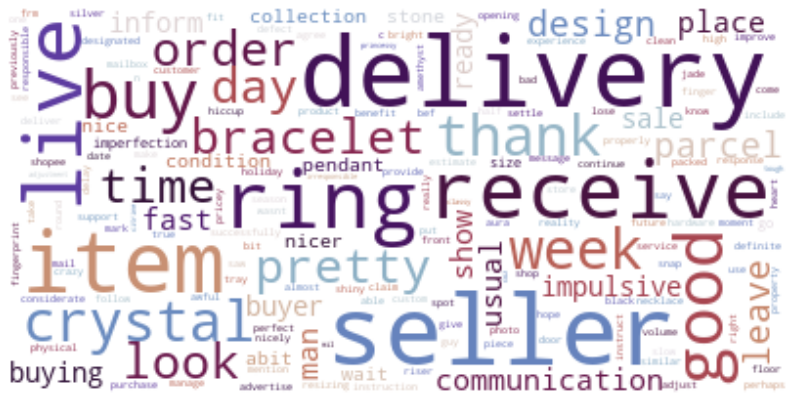

In [15]:
four_star_wordcloud = WordCloud(
    background_color='white',
    max_font_size = 50,
    max_words = 500,
    colormap='twilight').generate(four_star_words)

plt.figure(figsize=(14, 12))
plt.imshow(four_star_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3c - 3-star reviews

In [16]:
three_star_words = " ".join(review for review in three_star_reviews["clean_comment"].to_list())

In [17]:
""" Top 20 words amongst 3-star reviews """

three_star_wordlist = three_star_words.split(' ')

counter_three = collections.Counter(three_star_wordlist)
counter_three.most_common(20)

[('ring', 3),
 ('look', 2),
 ('box', 2),
 ('seller', 2),
 ('quality', 2),
 ('sale', 2),
 ('cant', 2),
 ('claim', 2),
 ('blame', 2),
 ('miscommunication', 1),
 ('take', 1),
 ('month', 1),
 ('deliver', 1),
 ('cheap', 1),
 ('adjustable', 1),
 ('color', 1),
 ('bad', 1),
 ('metal', 1),
 ('light', 1),
 ('basic', 1)]

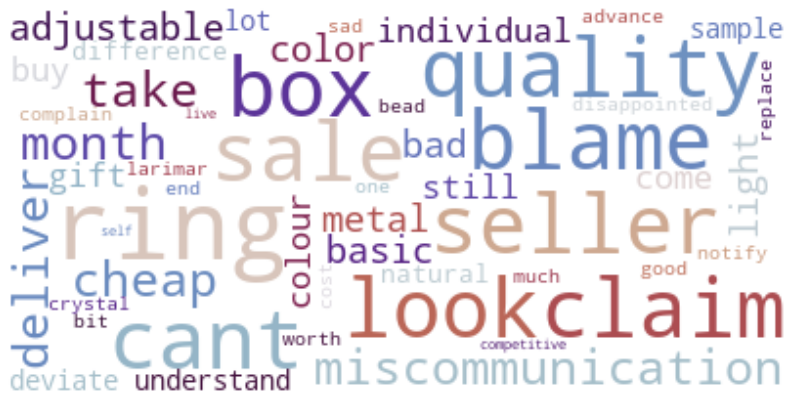

In [18]:
three_star_wordcloud = WordCloud(
    background_color='white',
    max_font_size = 50,
    max_words = 500,
    colormap='twilight').generate(three_star_words)

plt.figure(figsize=(14, 12))
plt.imshow(three_star_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3d - 2-star reviews

In [19]:
two_star_words = " ".join(review for review in two_star_reviews["clean_comment"].to_list())

In [20]:
""" Top 20 words amongst 2-star reviews """

two_star_wordlist = two_star_words.split(' ')

counter_two = collections.Counter(two_star_wordlist)
counter_two.most_common(20)

[('exchange', 4),
 ('ring', 4),
 ('item', 4),
 ('buy', 3),
 ('seller', 3),
 ('nice', 3),
 ('however', 3),
 ('quality', 3),
 ('stone', 3),
 ('live', 3),
 ('piece', 2),
 ('send', 2),
 ('wrong', 2),
 ('provide', 2),
 ('crystal', 2),
 ('good', 2),
 ('string', 2),
 ('stick', 2),
 ('hav', 2),
 ('qced', 2)]

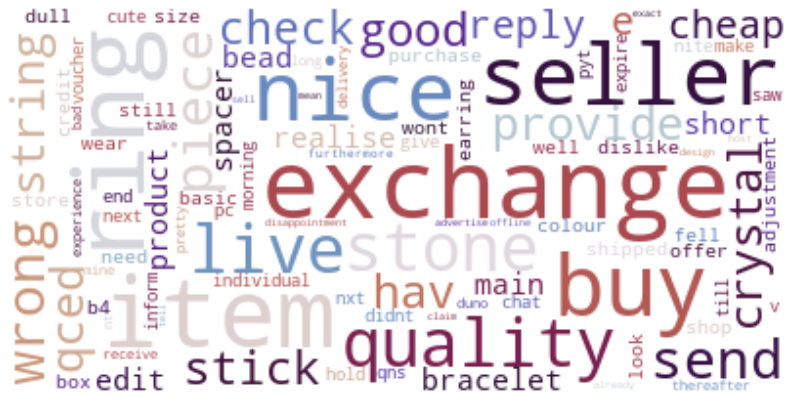

In [21]:
two_star_wordcloud = WordCloud(
    background_color='white',
    max_font_size = 50,
    max_words = 500,
    colormap='twilight').generate(two_star_words)

plt.figure(figsize=(14, 12))
plt.imshow(two_star_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3e - 1-star reviews

In [22]:
one_star_words = " ".join(review for review in one_star_reviews["clean_comment"].to_list())

In [23]:
""" Top 20 words amongst 1-star reviews """

one_star_wordlist = one_star_words.split(' ')

counter_one = collections.Counter(one_star_wordlist)
counter_one.most_common(20)

[('seller', 4),
 ('buy', 3),
 ('gem', 2),
 ('fell', 2),
 ('immediately', 2),
 ('order', 2),
 ('receive', 2),
 ('fairy', 2),
 ('price', 2),
 ('confirm', 1),
 ('pm', 1),
 ('ed', 1),
 ('still', 1),
 ('await', 1),
 ('response', 1),
 ('today', 1),
 ('wear', 1),
 ('less', 1),
 ('hour', 1),
 ('didnt', 1)]

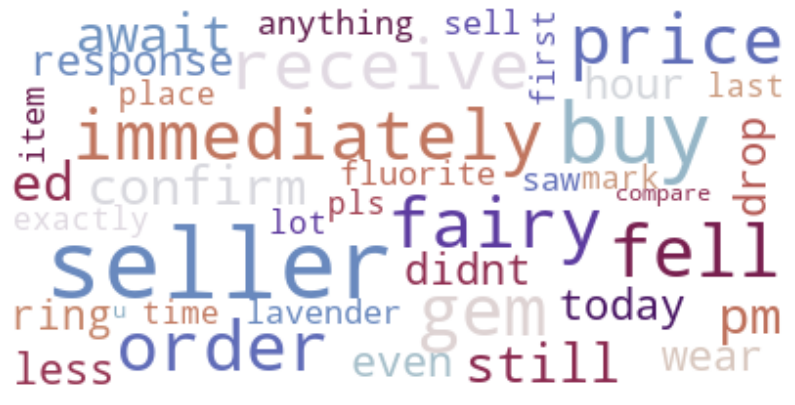

In [24]:
one_star_wordcloud = WordCloud(
    background_color='white',
    max_font_size = 50,
    max_words = 500,
    colormap='twilight').generate(one_star_words)

plt.figure(figsize=(14, 12))
plt.imshow(one_star_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()